In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
from scipy.optimize import curve_fit as fit

In [2]:
# defines the intensity shape of the beam. amplitude is not specified (not necesary, as it does not change throughout the experiment)

# pos: array of positions over which we want the intensity distribution
# beamCenter: center position of the intensity distribution
# beamWidth: gaussian width

def beam(pos, beamCenter, beamWidth):
    return np.exp(-((pos - beamCenter) ** 2) / (beamWidth ** 2))

In [3]:
# defines the shape of the "transfer function" of the psd chip. values on the left return -1. values on the right return 1

# pos: array of positions over which we want the psd "transfer function"
# chipCenter: center position of the chip
# chipWidth: width of the chip

def psd(pos, chipCenter, chipWidth):
    P = np.zeros_like(pos)
    for i in range(len(P)):
        if abs(pos[i] - chipCenter) > chipWidth / 2:
            P[i] = 0
        elif pos[i] - chipCenter < 0:
            P[i] = -1
        elif pos[i] - chipCenter > 0:
            P[i] = 1
    return P

In [4]:
# defines the expected voltage distribution for a range of laser positions

# beamCenterPos: positions of the laser
# integrationStep: step size used by the function when integrating over the face of the chip
# A: an arbitrary amplitude, for fitting

def V_dist(beamCenterPos, chipCenter, beamWidth, chipWidth, integrationStep, A):
    posToIntegrate = np.arange(chipCenter - chipWidth / 2, chipCenter + chipWidth / 2, integrationStep)
    dist = []
    for i in beamCenterPos:
        I = trapezoid(beam(posToIntegrate, i, beamWidth) * psd(posToIntegrate, chipCenter, chipWidth), posToIntegrate)
        dist.append(I)
    return abs(A) * np.array(dist)

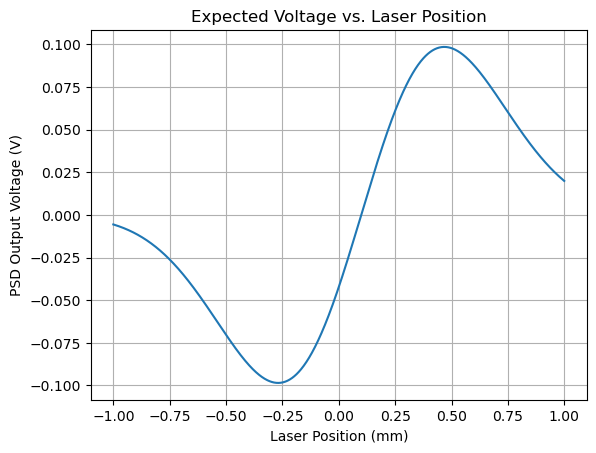

In [9]:
# example plot

P = np.linspace(-1, 1, 1000)
chipCenter = 0.1
beamWidth = 0.5
chipWidth = 0.5
plt.plot(P, V_dist(P, chipCenter, beamWidth, chipWidth, 0.001, 1))
plt.grid()
plt.xlabel("Laser Position (mm)")
plt.ylabel("PSD Output Voltage (V)")
plt.title("Expected Voltage vs. Laser Position")
plt.show()

In [10]:
# data taken -10/31/24
LR_position = [3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,7.25,6.75,6.25,5.75,5.25,4.75,4.25,3.75, 3.25]
LR_volts = [-17.4,-16.4,-12.6,-6.0,1.5,8.0,11.9,15.1,16.0,15.2,15.9,16.0,13.8,9.9,4.8,-2.2,-9.2,-14.0,-16.4]

chipWidth = 5 # mm
integrationStep = 0.001

fitResult = fit(lambda P, chipCenter, beamWidth, A : V_dist(P, chipCenter, beamWidth, chipWidth, integrationStep, A), LR_position, LR_volts, p0 = [5, 1, 15])
chipCenter = fitResult[0][0]
beamWidth = fitResult[0][1]
A = fitResult[0][2]



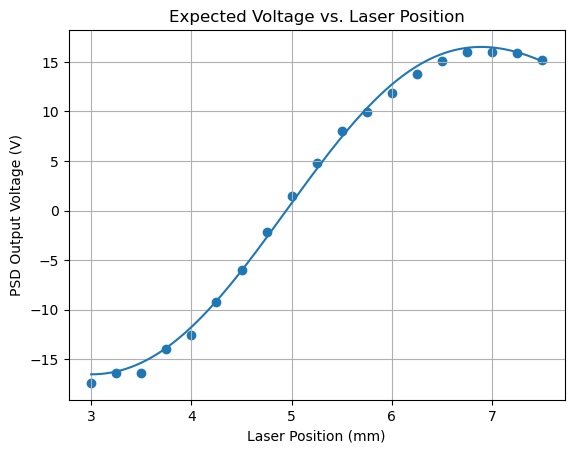

Chip Center:  4.9 mm
Beam Width:  2.3 mm
A:  10.0 V


In [11]:
pos = np.linspace(3, 7.5, 1000)
plt.scatter(LR_position, LR_volts)
plt.plot(pos, V_dist(pos, chipCenter, beamWidth, chipWidth, integrationStep, A))
plt.grid()
plt.xlabel("Laser Position (mm)")
plt.ylabel("PSD Output Voltage (V)")
plt.title("Expected Voltage vs. Laser Position")
plt.show()

print("Chip Center: ", round(chipCenter, 1), "mm")
print("Beam Width: ", round(beamWidth, 1), "mm")
print("A: ", round(A, 1), "V")